<a href="https://colab.research.google.com/github/G-Shino/colab_tutorial/blob/master/20190619_%E6%95%B0%E5%80%A4%E8%A7%A3%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

993


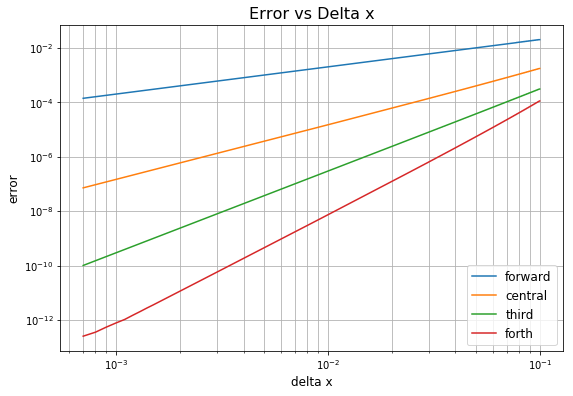

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

list_dx = np.arange(0.0007, 0.1, 0.0001)
print(len(list_dx))
x_lower = 0.5
x_upper = 5

def f(x):
  return np.log(x)

def forward_difference(x, dx):
  df = (f(x+dx) - f(x))/dx
  return df

def central_difference(x, dx):
  df = (f(x+dx) - f(x-dx)) / (2*dx)
  return df

def third_difference(x, dx):
  df = (-1 * f(x+2*dx) + 6 * f(x+dx) - 3 * f(x) - 2*f(x-dx)) / (6 * dx)
  return df

def forth_difference(x, dx):
  df = (-f(x+2*dx) + 8 * f(x+dx) - 8 * f(x-dx) + f(x-2*dx)) / (12 * dx)
  return df

def error(y_true, y_result):
  return np.sum(np.abs(y_true - y_result)) / len(y_true)


list_error_forward = list()
list_error_central = list()
list_error_third = list()
list_error_forth = list()

for dx in list_dx:
  x = np.arange(x_lower, x_upper+dx, dx)
  y_true = 1/x
  y_forward = np.vectorize(forward_difference)(x, dx)
  y_central = np.vectorize(central_difference)(x, dx)
  y_third = np.vectorize(third_difference)(x, dx)
  y_forth = np.vectorize(forth_difference)(x, dx)
  list_error_forward.append(error(y_true, y_forward))
  list_error_central.append(error(y_true, y_central))
  list_error_third.append(error(y_true, y_third))
  list_error_forth.append(error(y_true, y_forth))

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.plot(list_dx, list_error_forward, label="forward")
ax.plot(list_dx, list_error_central, label="central")
ax.plot(list_dx, list_error_third, label="third")
ax.plot(list_dx, list_error_forth, label="forth")
ax.set_xscale("log") 
ax.set_yscale("log")
ax.set_xlabel("delta x",fontsize=12)
ax.set_ylabel("error",fontsize=12)
ax.set_title("Error vs Delta x", fontsize=16)
ax.grid(which="both")
ax.legend(fontsize=12)
fig.show()
plt.savefig("error_vs_deltax.jpg")

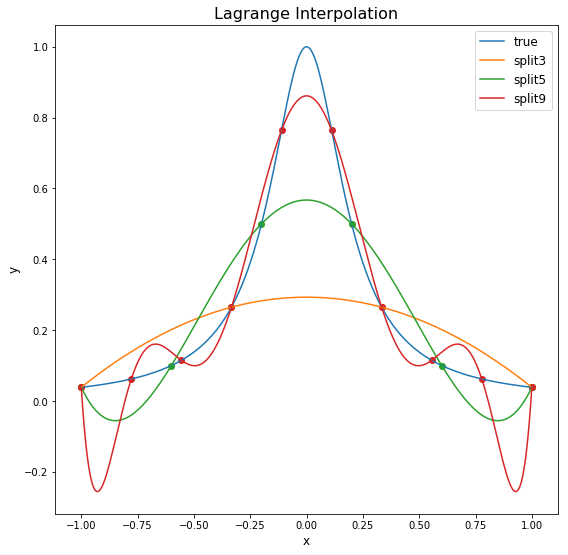

In [0]:
import numpy as np
import matplotlib.pyplot as plt

list_n = [3, 5, 9]
x_lower = -1
x_upper = 1
n = list_n[0]

def f(x):
  return 1 / (1 + 25 * x**2)

def lagrange(x_gap, y_gap):
  def f_ans(x):
    ans = 0
    for i, y in zip(x_gap, y_gap):
      ans_partial = 1
      for j in x_gap:
        if j == i:
          continue
        ans_partial *= (x-j)/(i-j)
      ans += ans_partial * y
    return ans
  return f_ans

x = np.linspace(x_lower, x_upper, 1000)
y = f(x)
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.plot(x, y, label="true")
cmap = plt.get_cmap("tab10") 
for i, n in enumerate(list_n):
  x_gap = np.linspace(x_lower, x_upper, n+1)
  y_gap = np.vectorize(f)(x_gap)
  f_lag = lagrange(x_gap, y_gap)
  y_ans = np.vectorize(f_lag)(x)
  ax.plot(x, y_ans, color=cmap(i+1), label="split"+str(n))
  ax.scatter(x_gap, y_gap, color=cmap(i+1))
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_title("Lagrange Interpolation", fontsize=16)
ax.legend(fontsize=12)
fig.show()
plt.savefig("lagrange_interpolatioin.jpg")

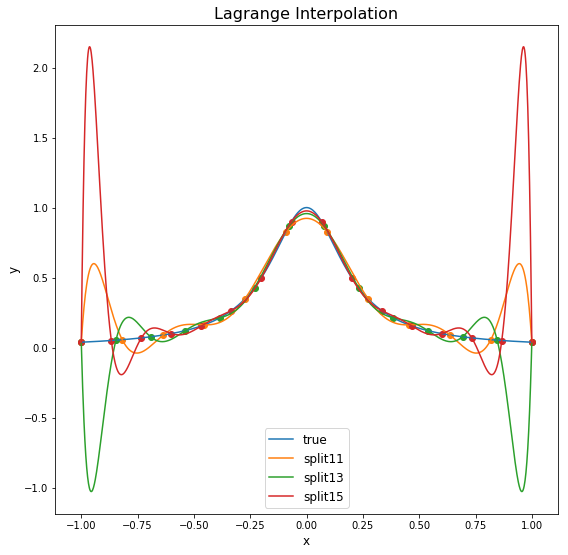

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

list_n = [11, 13, 15]
x_lower = -1
x_upper = 1
n = list_n[0]

def f(x):
  return 1 / (1 + 25 * x**2)

def lagrange(x_gap, y_gap):
  def f_ans(x):
    ans = 0
    for i, y in zip(x_gap, y_gap):
      ans_partial = 1
      for j in x_gap:
        if j == i:
          continue
        ans_partial *= (x-j)/(i-j)
      ans += ans_partial * y
    return ans
  return f_ans

x = np.linspace(x_lower, x_upper, 1000)
y = f(x)
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.plot(x, y, label="true")
cmap = plt.get_cmap("tab10") 
for i, n in enumerate(list_n):
  x_gap = np.linspace(x_lower, x_upper, n+1)
  y_gap = np.vectorize(f)(x_gap)
  f_lag = lagrange(x_gap, y_gap)
  y_ans = np.vectorize(f_lag)(x)
  ax.plot(x, y_ans, color=cmap(i+1), label="split"+str(n))
  ax.scatter(x_gap, y_gap, color=cmap(i+1))
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_title("Lagrange Interpolation", fontsize=16)
ax.legend(fontsize=12)
fig.show()
plt.savefig("lagrange_interpolatioin_2.jpg")